In [1]:
import pandas as pd
import os
import re
import numpy as np
import seaborn as sns
from matplotlib import pyplot
sns.set_style("whitegrid")

os.chdir(os.path.expanduser('~/Dropbox/Projects/kaggle/'))
from eda import *

%load_ext autotime
%matplotlib inline

os.chdir(os.path.expanduser("~/Dropbox/Projects/data/sports/"))

In [2]:
cols = ['place', 'name', 'bib', 'age', 'gender', 'pos', 'group', 
        'swim_rnk', 'swim_time', 't1', 'bike_rnk', 'bike_time', 't2', 'run_rnk', 'run_time', 'total_time']
df = pd.read_csv('blackdiamondtri2017.csv', header=None, names=cols)
df.head()

,place,name,bib,age,gender,pos,group,swim_rnk,swim_time,t1,bike_rnk,bike_time,t2,run_rnk,run_time,total_time
0,1,Kyle Carrick,542,36,M,1,Top Fin,8.0,14:14.50,01:11.30,1.0,35:26.10,00:50.30,1.0,17:15.30,01:08:57.50
1,2,Andrew Richards,410,27,M,2,Top Fin,5.0,13:17.70,00:35.50,3.0,36:41.30,00:34.80,4.0,18:05.00,01:09:14.30
2,3,Ryan Lechleiter,322,27,M,3,Top Fin,4.0,13:14.30,01:23.30,7.0,37:51.10,00:47.80,3.0,17:58.50,01:11:15.00
3,4,Sean Harwin,255,29,M,1,25-29,2.0,13:08.20,00:38.00,6.0,37:39.30,00:40.80,13.0,19:40.80,01:11:47.10
4,5,Paul Raknes,404,48,M,1,45-49,11.0,14:52.60,00:35.50,5.0,37:04.50,00:52.50,9.0,19:21.70,01:12:46.80


time: 16.3 ms


In [3]:
def pad_hour(df, col):
    df.loc[df[col].str.len() < 10, col] = '00:' + df[col]
    df[col] = pd.to_timedelta(df[col]).dt.total_seconds() / 60
    return df
time_cols = ['swim_time', 't1', 'bike_time', 't2', 'run_time', 'total_time']
for tc in time_cols:
    df = pad_hour(df, tc)
    
df.head()

,place,name,bib,age,gender,pos,group,swim_rnk,swim_time,t1,bike_rnk,bike_time,t2,run_rnk,run_time,total_time
0,1,Kyle Carrick,542,36,M,1,Top Fin,8.0,14.241667,1.188333,1.0,35.435000,0.838333,1.0,17.255000,68.958333
1,2,Andrew Richards,410,27,M,2,Top Fin,5.0,13.295000,0.591667,3.0,36.688333,0.580000,4.0,18.083333,69.238333
2,3,Ryan Lechleiter,322,27,M,3,Top Fin,4.0,13.238333,1.388333,7.0,37.851667,0.796667,3.0,17.975000,71.250000
3,4,Sean Harwin,255,29,M,1,25-29,2.0,13.136667,0.633333,6.0,37.655000,0.680000,13.0,19.680000,71.785000
4,5,Paul Raknes,404,48,M,1,45-49,11.0,14.876667,0.591667,5.0,37.075000,0.875000,9.0,19.361667,72.780000


time: 43 ms


In [4]:
for c in df.columns[df.dtypes == 'object'].tolist():
    df[c] = df[c].str.strip()
df.head()

,place,name,bib,age,gender,pos,group,swim_rnk,swim_time,t1,bike_rnk,bike_time,t2,run_rnk,run_time,total_time
0,1,Kyle Carrick,542,36,M,1,Top Fin,8.0,14.241667,1.188333,1.0,35.435000,0.838333,1.0,17.255000,68.958333
1,2,Andrew Richards,410,27,M,2,Top Fin,5.0,13.295000,0.591667,3.0,36.688333,0.580000,4.0,18.083333,69.238333
2,3,Ryan Lechleiter,322,27,M,3,Top Fin,4.0,13.238333,1.388333,7.0,37.851667,0.796667,3.0,17.975000,71.250000
3,4,Sean Harwin,255,29,M,1,25-29,2.0,13.136667,0.633333,6.0,37.655000,0.680000,13.0,19.680000,71.785000
4,5,Paul Raknes,404,48,M,1,45-49,11.0,14.876667,0.591667,5.0,37.075000,0.875000,9.0,19.361667,72.780000


time: 16.8 ms


In [5]:
# df['dist'] = ['sprint' if tt < 15000 else 'half iron' for tt in df.total_time]

df['dist'] = ['sprint' if i < 237 else 'half iron' for i in df.index]

df['gend_dist'] = df.gender + df.dist

time: 13.6 ms


In [6]:
df = df[((df.dist == 'sprint') & (df.run_time < 100)) | ((df.dist == 'half iron') & (df.run_time < 250))]

time: 16 ms


In [7]:
df.dtypes

place           int64
name           object
bib             int64
age             int64
gender         object
pos             int64
group          object
swim_rnk      float64
swim_time     float64
t1            float64
bike_rnk      float64
bike_time     float64
t2            float64
run_rnk       float64
run_time      float64
total_time    float64
dist           object
gend_dist      object
dtype: object

time: 14.6 ms


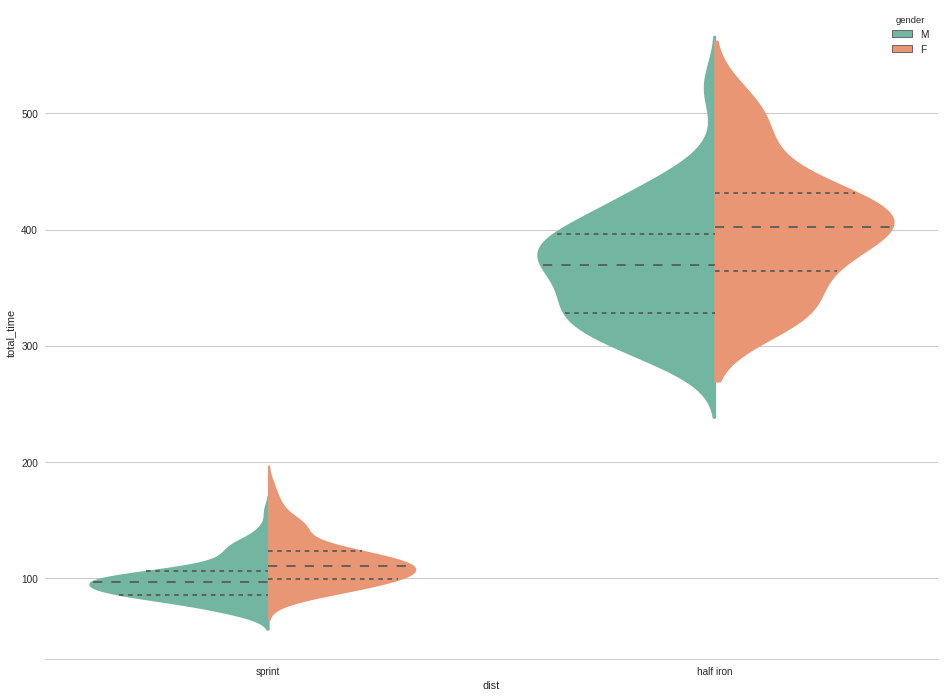

time: 312 ms


In [8]:
fig, ax = pyplot.subplots(figsize=(16, 12))
sns.violinplot(x="dist", y="total_time", hue="gender", data=df, split=True, inner="quart", 
               size=15, palette="Set2", ax=ax)
sns.despine(left=True)

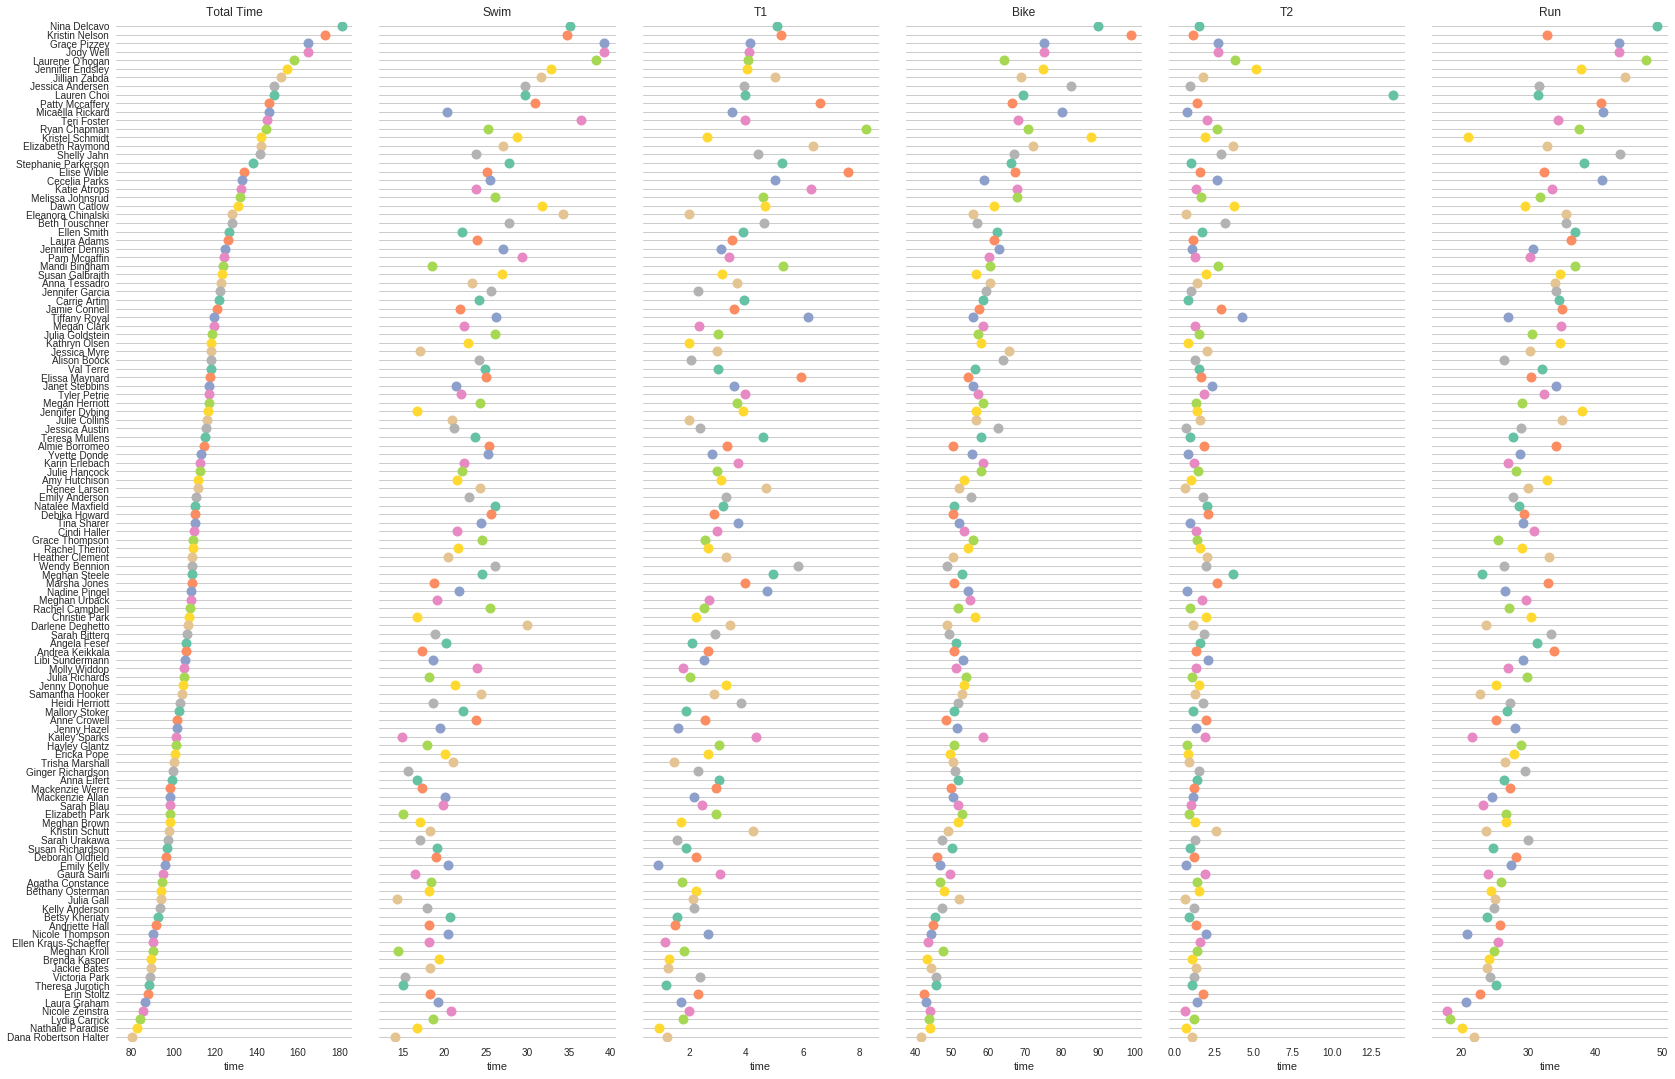

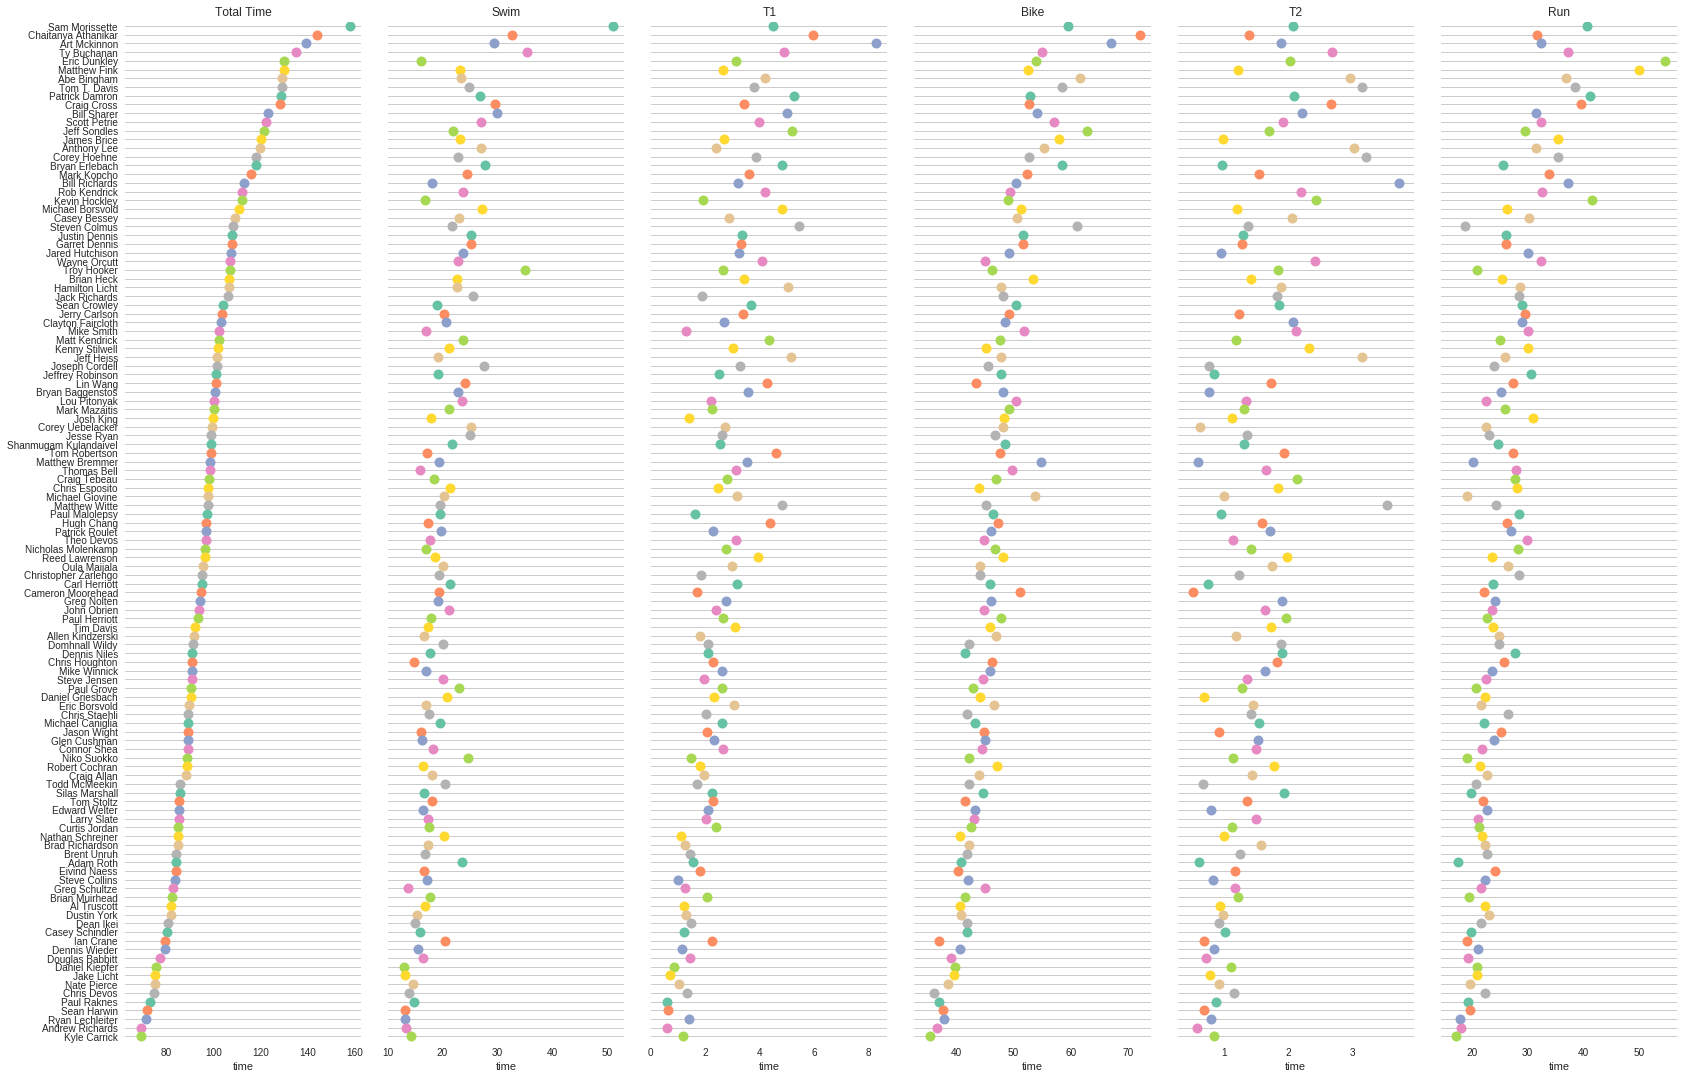

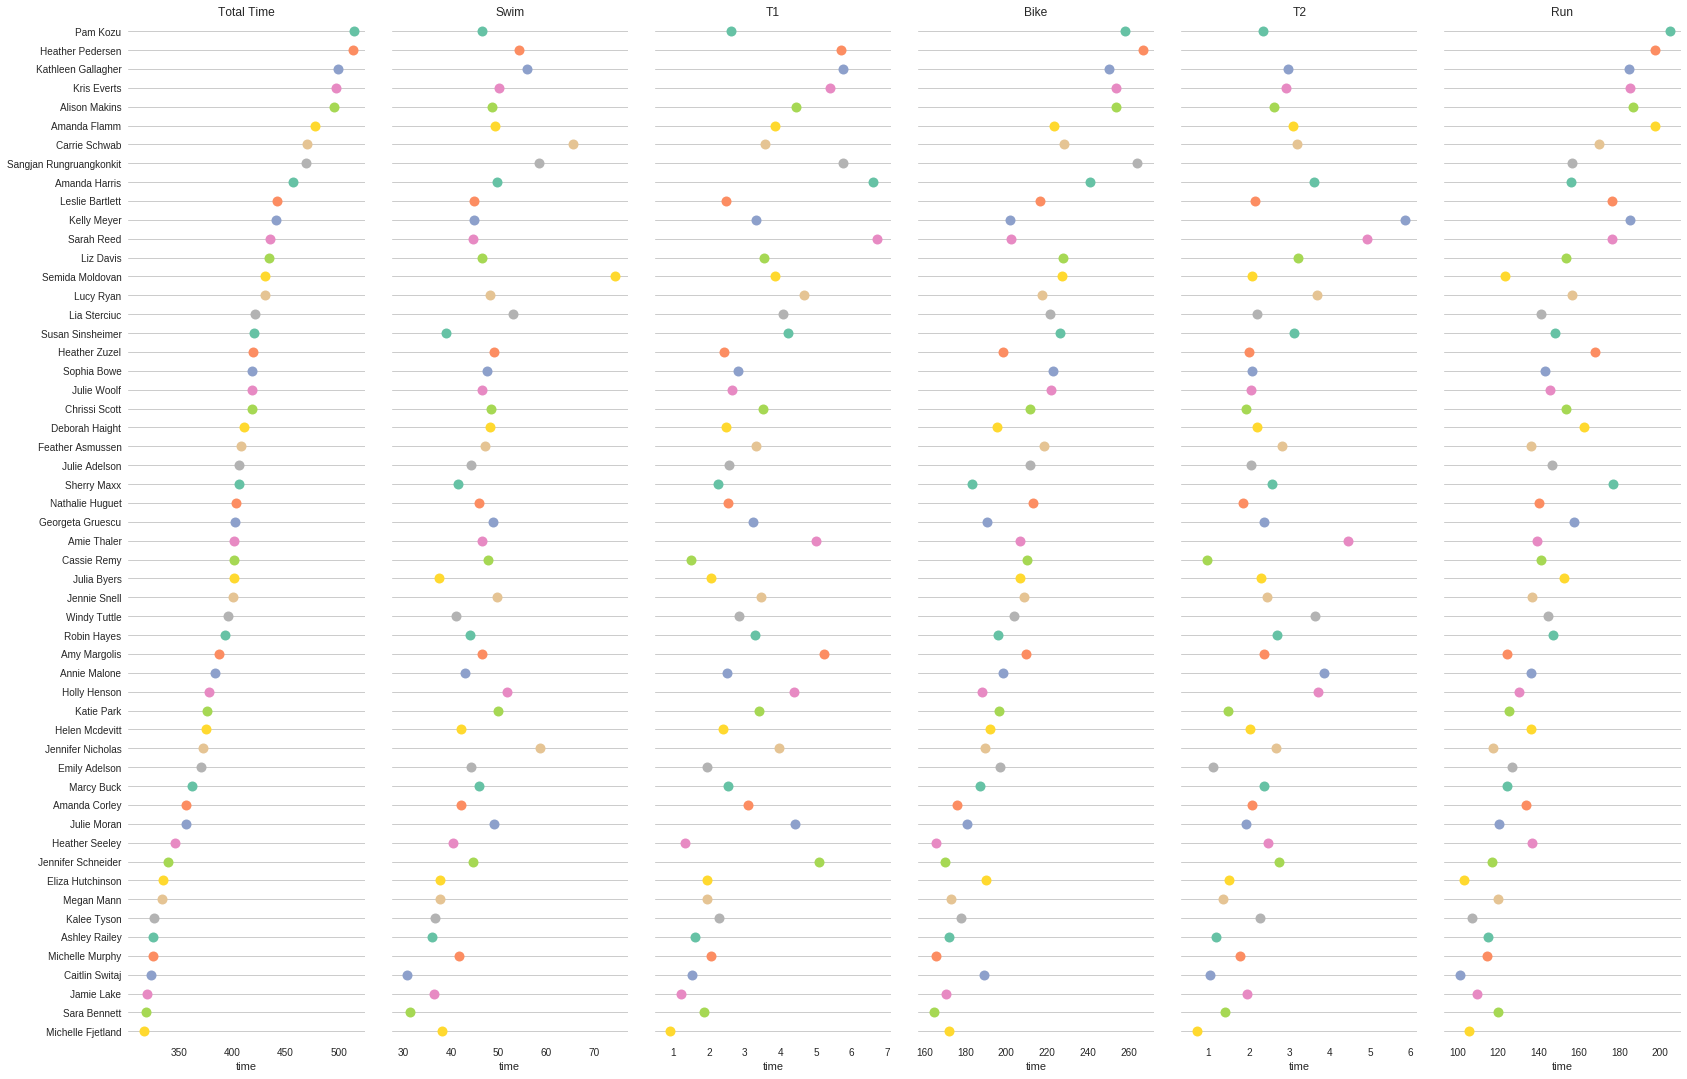

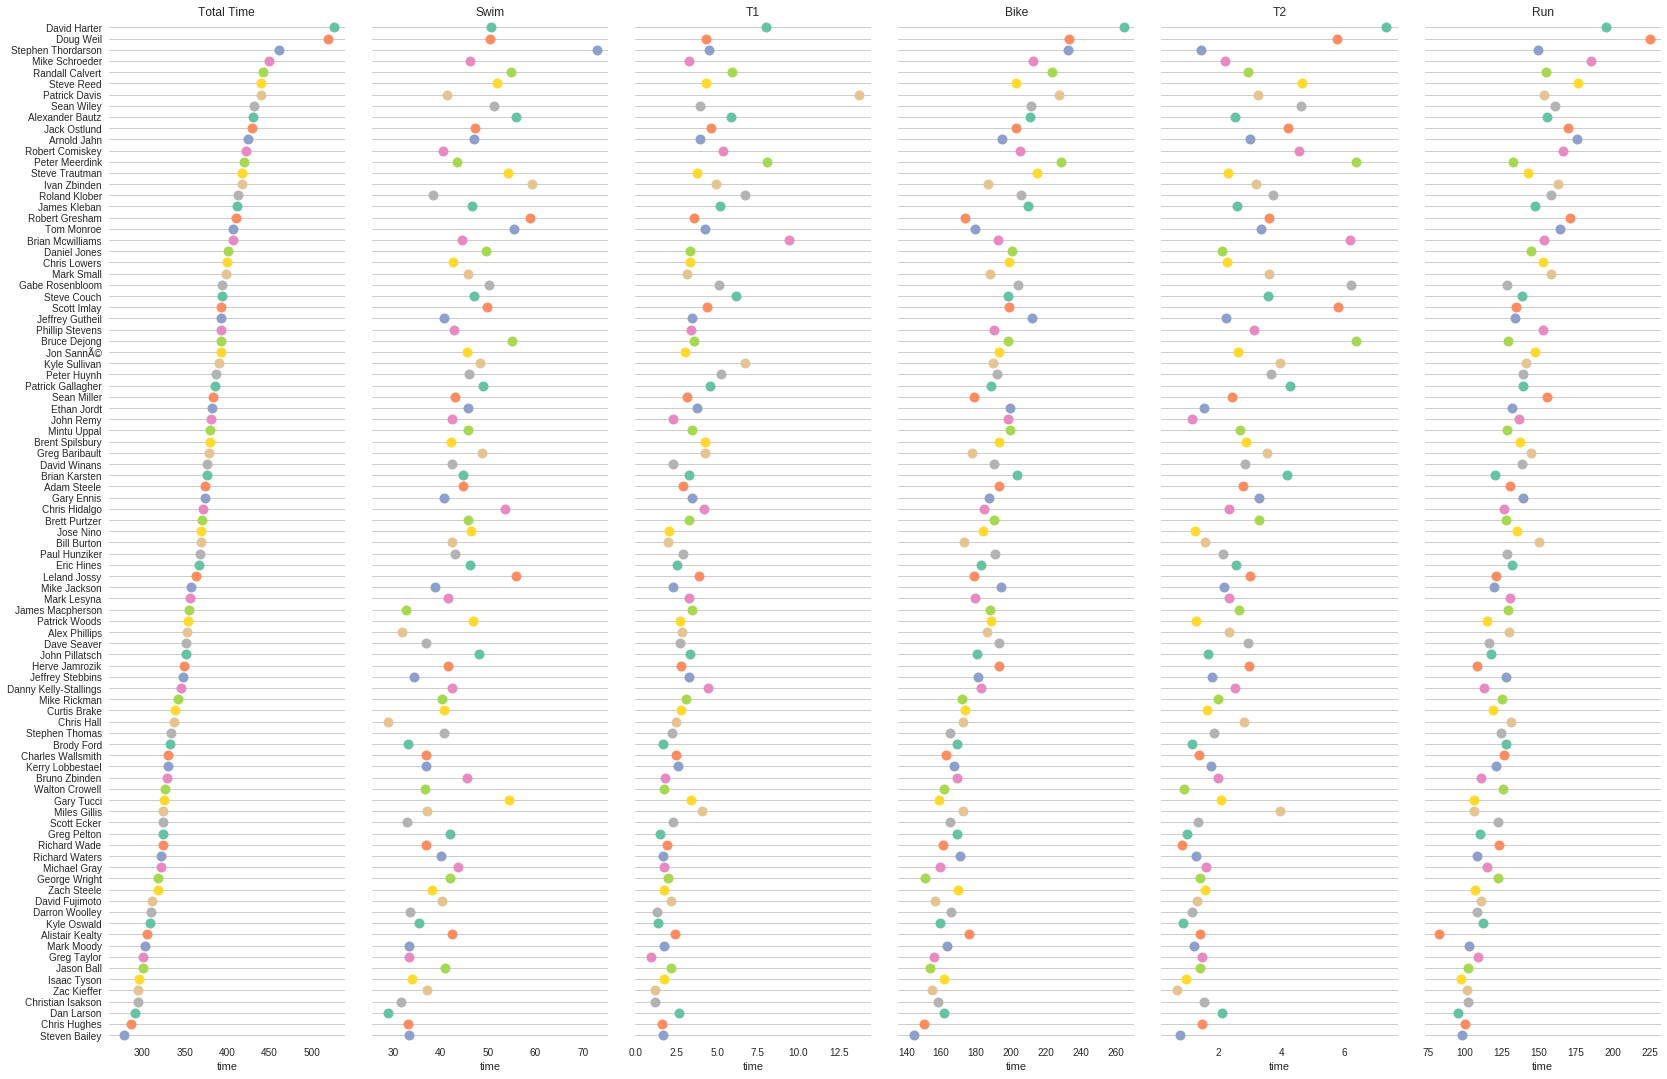

time: 14.6 s


In [9]:
sns.set(style="whitegrid")

def dot_plot(df):
    g = sns.PairGrid(df.sort_values("total_time", ascending=False),
                     x_vars=['total_time', 'swim_time', 't1', 'bike_time', 't2', 'run_time'], y_vars=["name"],
                     size=15, aspect=.25)
    g.map(sns.stripplot, size=10, orient="h", 
          palette="Set2", edgecolor="gray")
    g.set(xlabel="time", ylabel="")
    titles = ["Total Time", "Swim", "T1", "Bike", "T2", "Run"]

    for ax, title in zip(g.axes.flat, titles):
        ax.set(title=title)
        ax.xaxis.grid(False)
        ax.yaxis.grid(True)

    sns.despine(left=True, bottom=True)

for gd in ['Fsprint', 'Msprint', 'Fhalf iron', 'Mhalf iron']:
    dot_plot(df[df.gend_dist == gd])

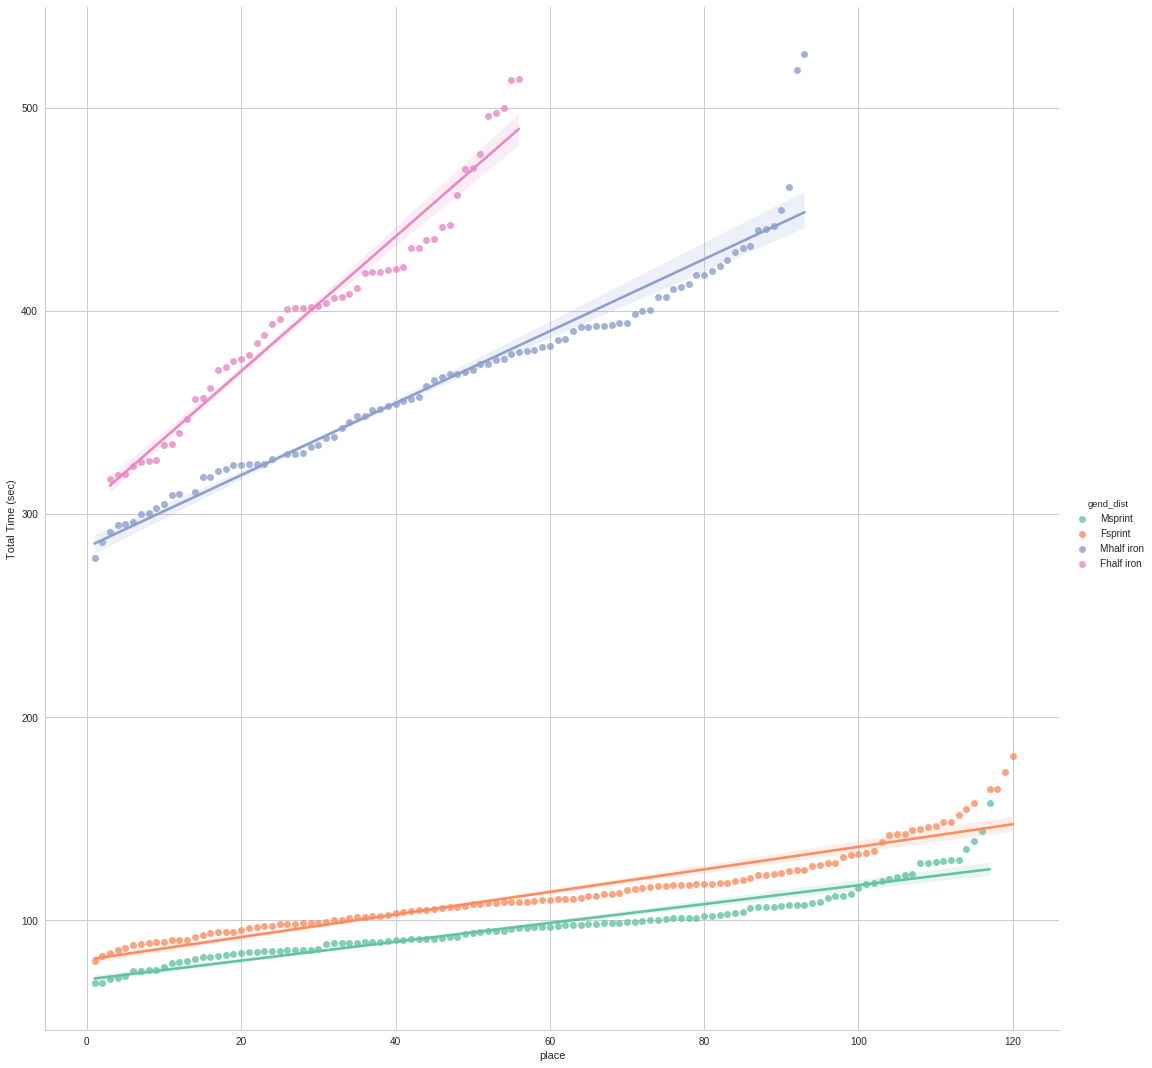

time: 774 ms


In [10]:
g = sns.lmplot(x="place", y="total_time", hue='gend_dist',
               truncate=True, size=15, data=df, palette="Set2")

g.set_axis_labels("place", "Total Time (sec)")

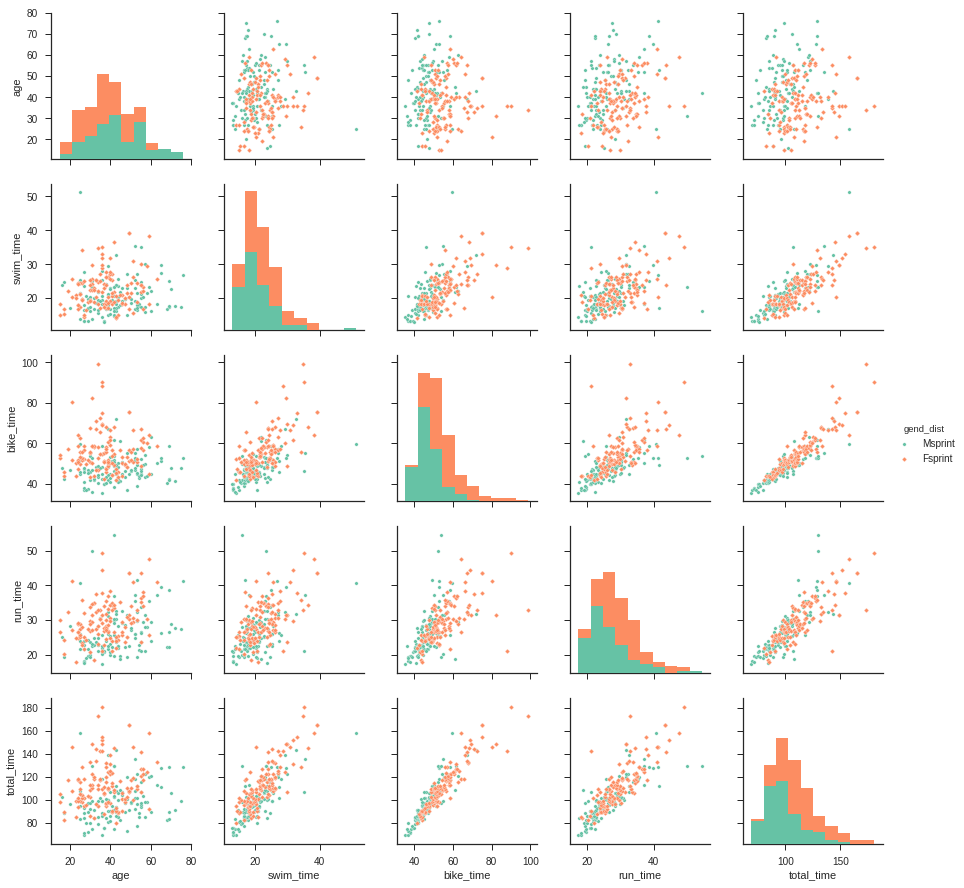

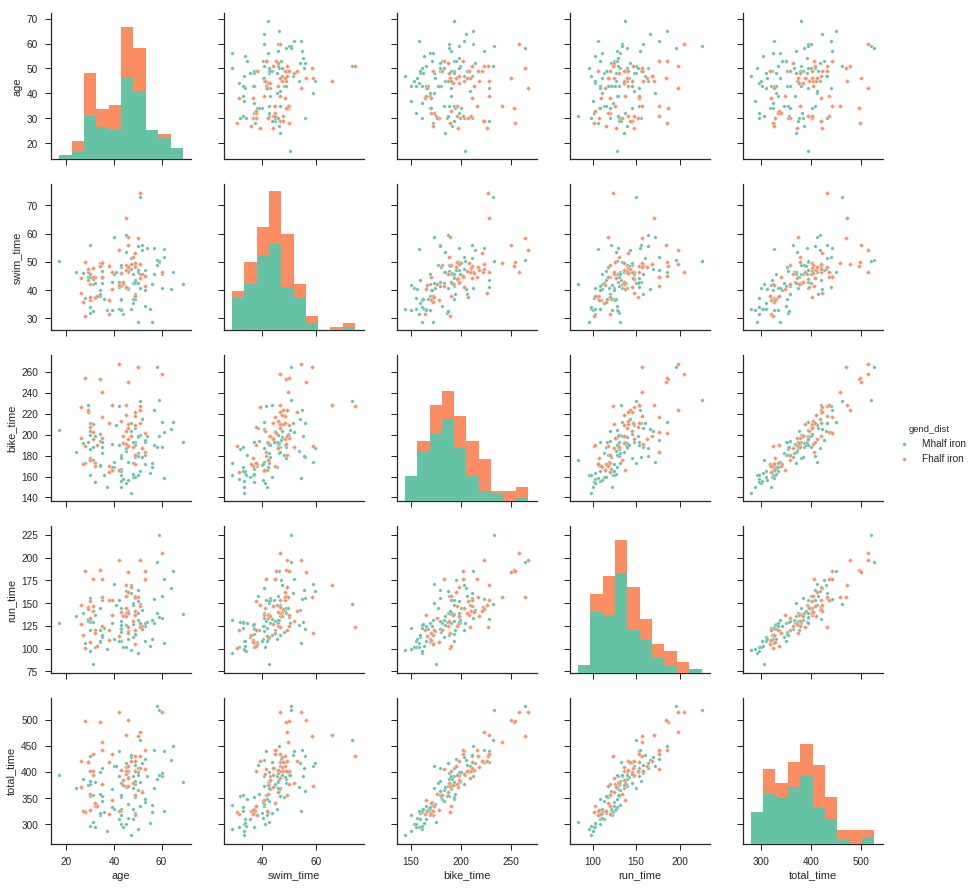

time: 5.86 s


In [11]:
sns.set(style="ticks")
for dist in ['sprint', 'half iron']:
    sns.pairplot(df.loc[df.dist == dist, ['age', 'swim_time', 'bike_time', 'run_time', 'total_time', 'gend_dist']], 
                 hue="gend_dist", palette="Set2", 
                 markers=["o", "D"], plot_kws={"s": 12})

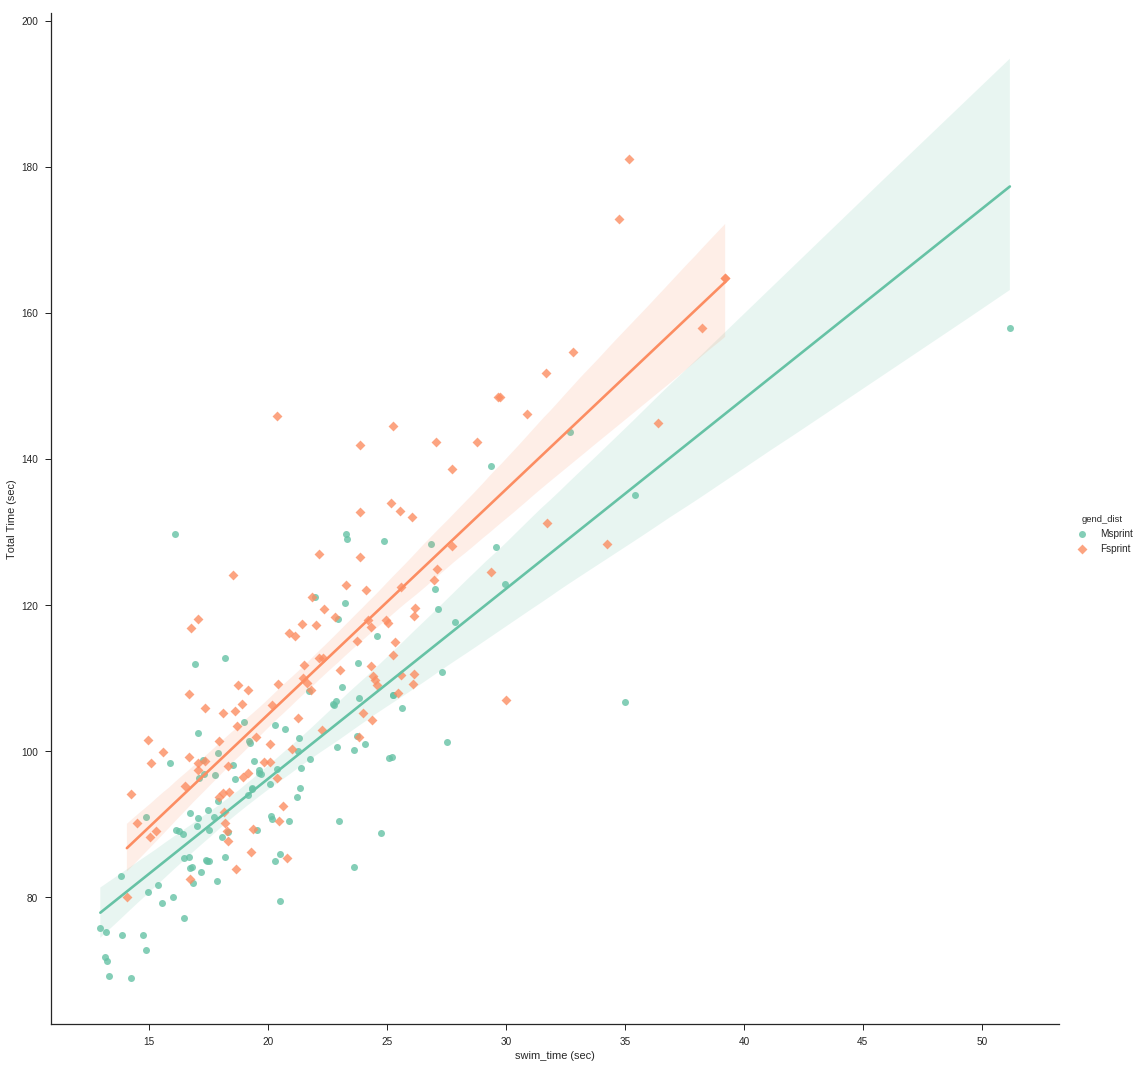

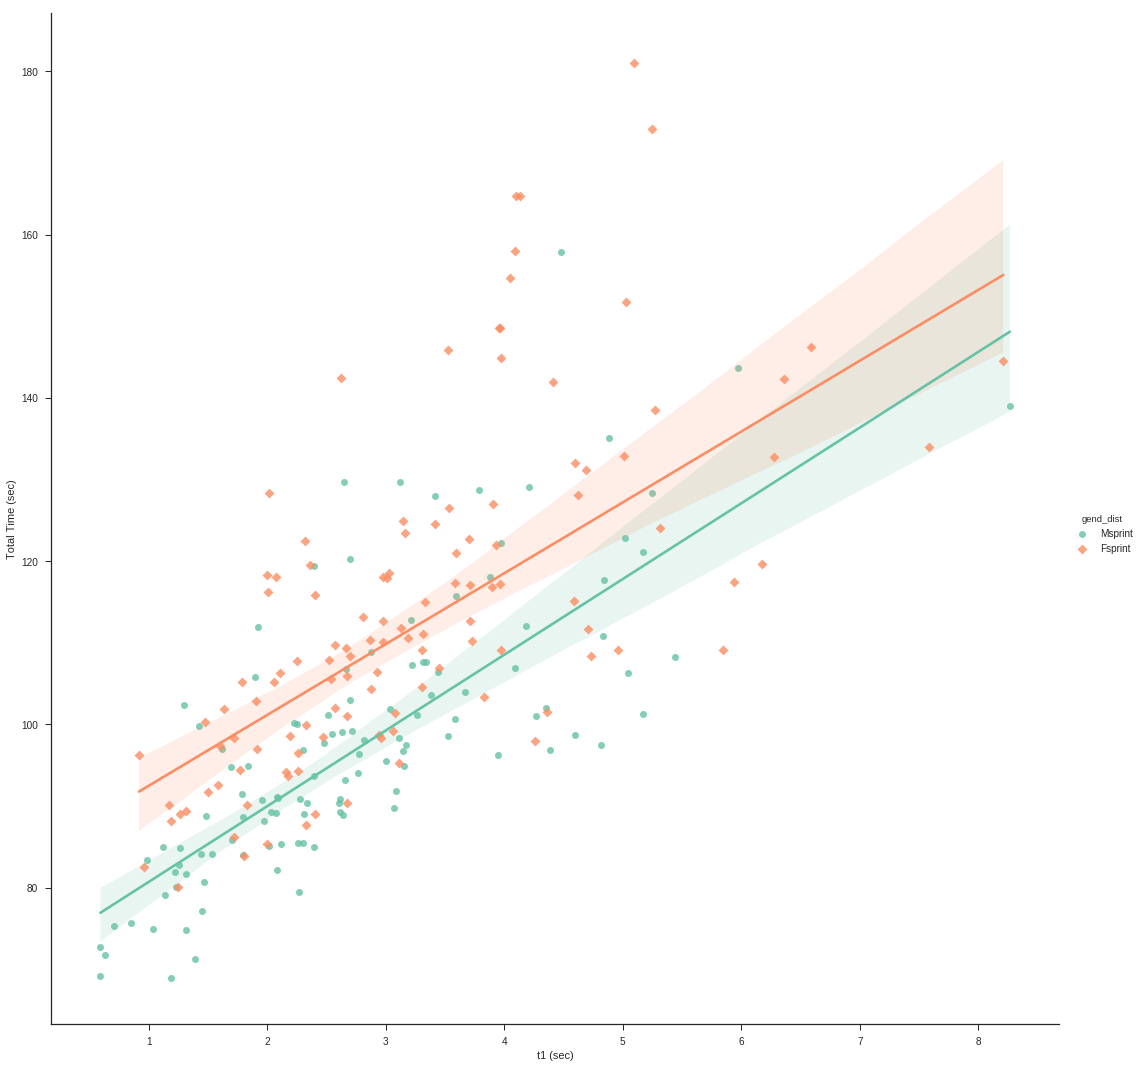

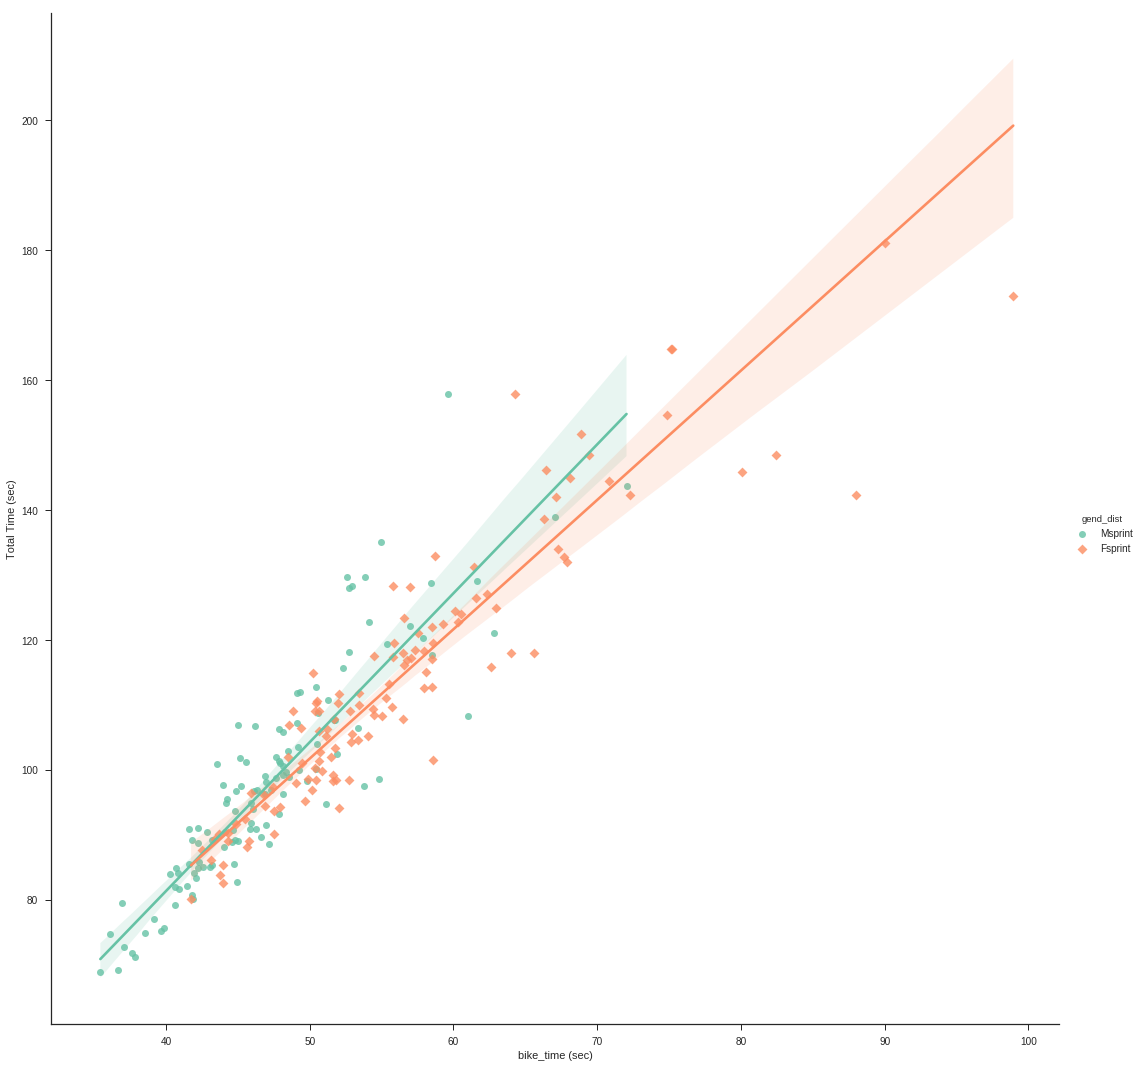

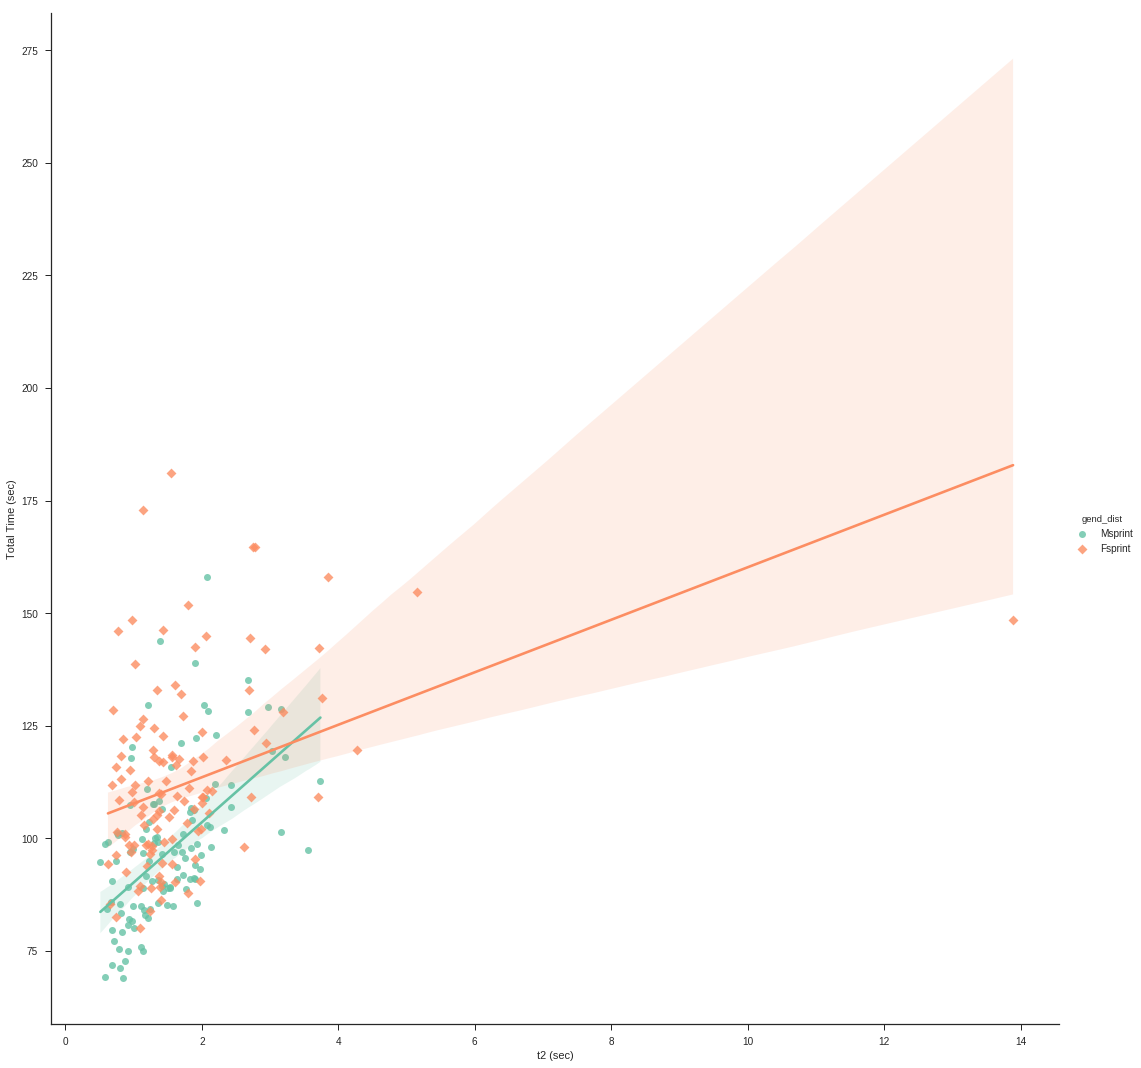

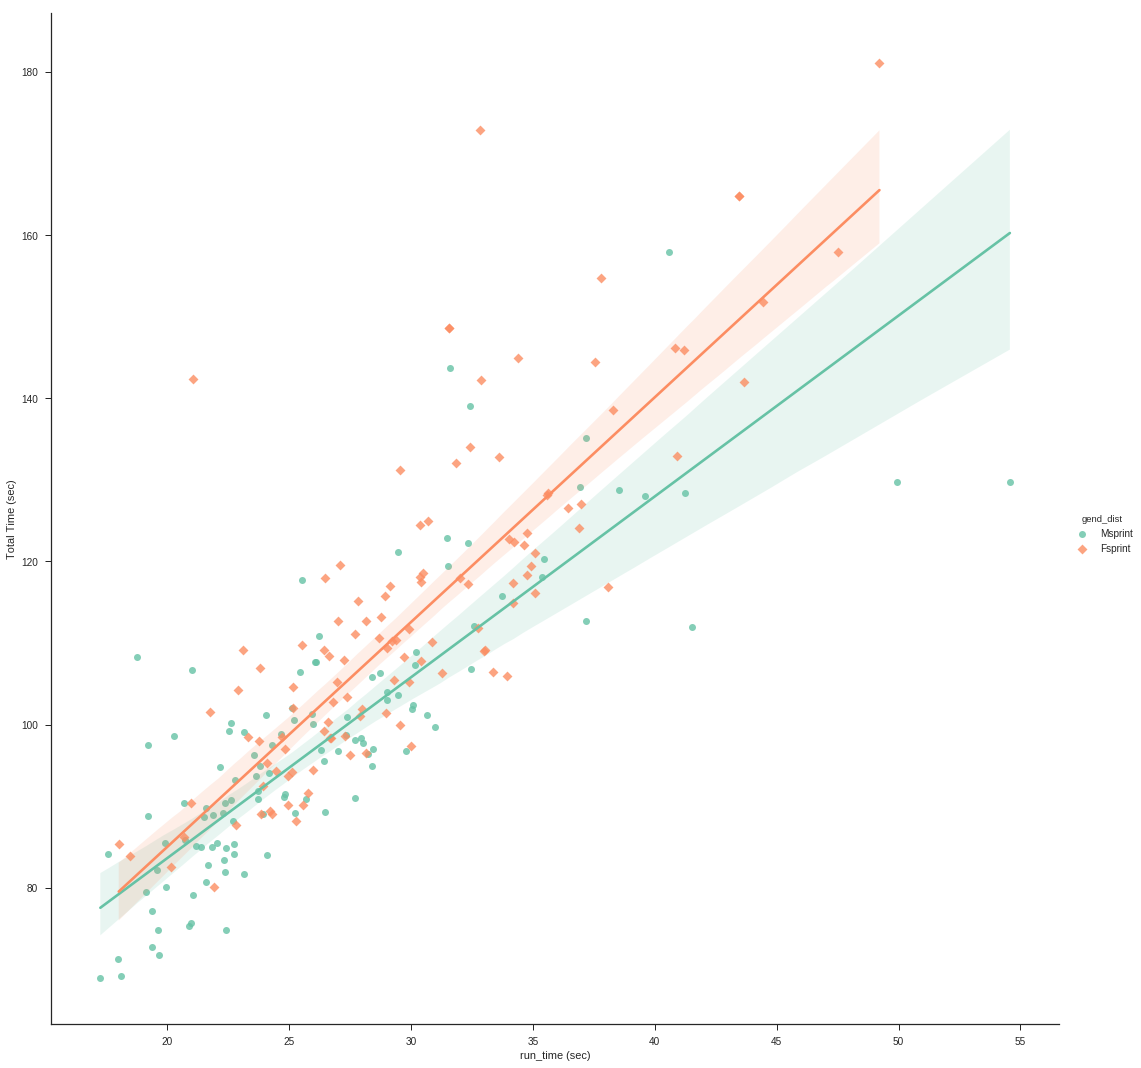

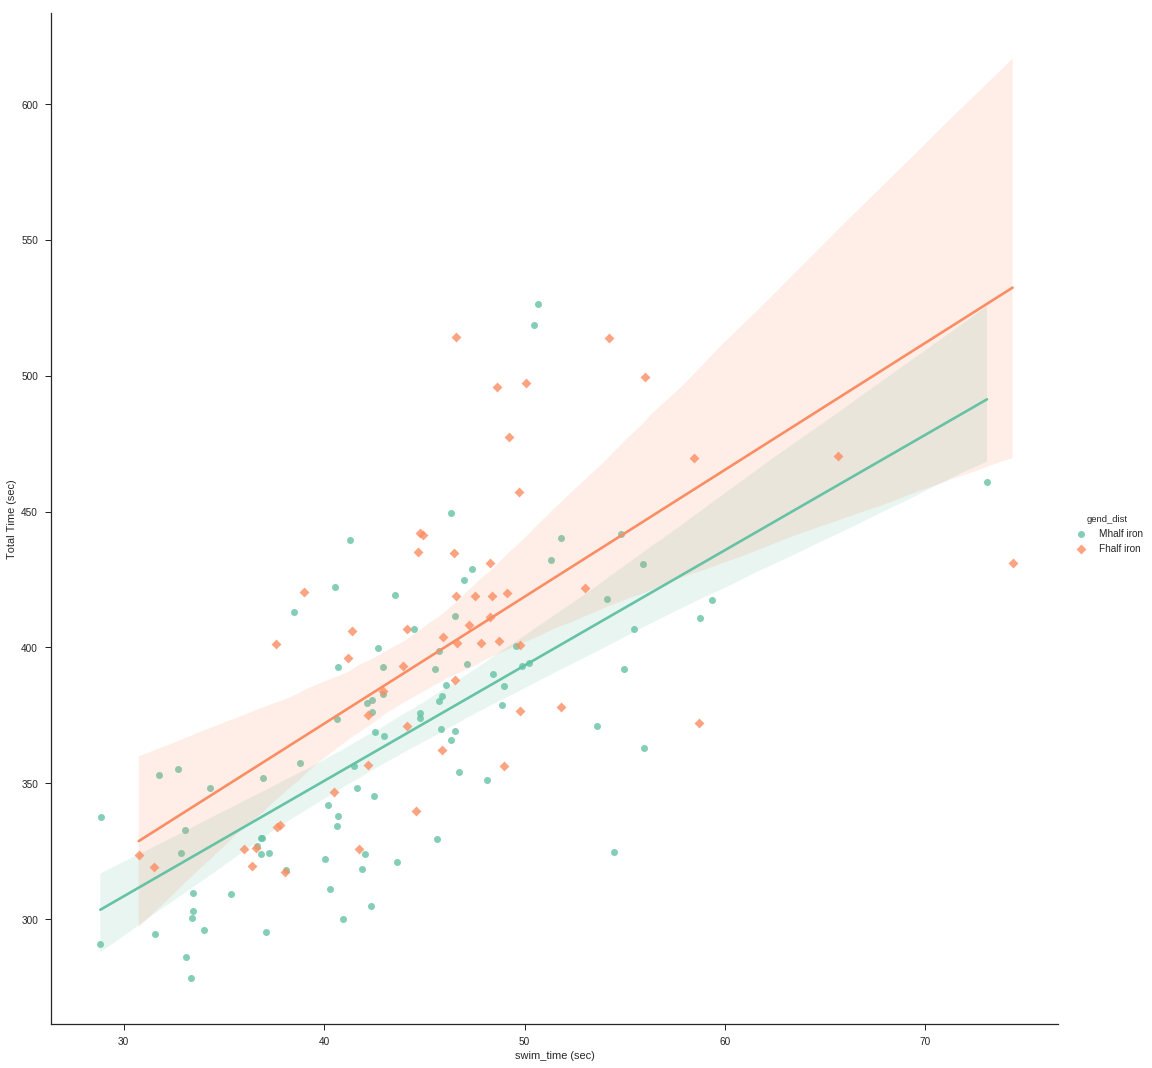

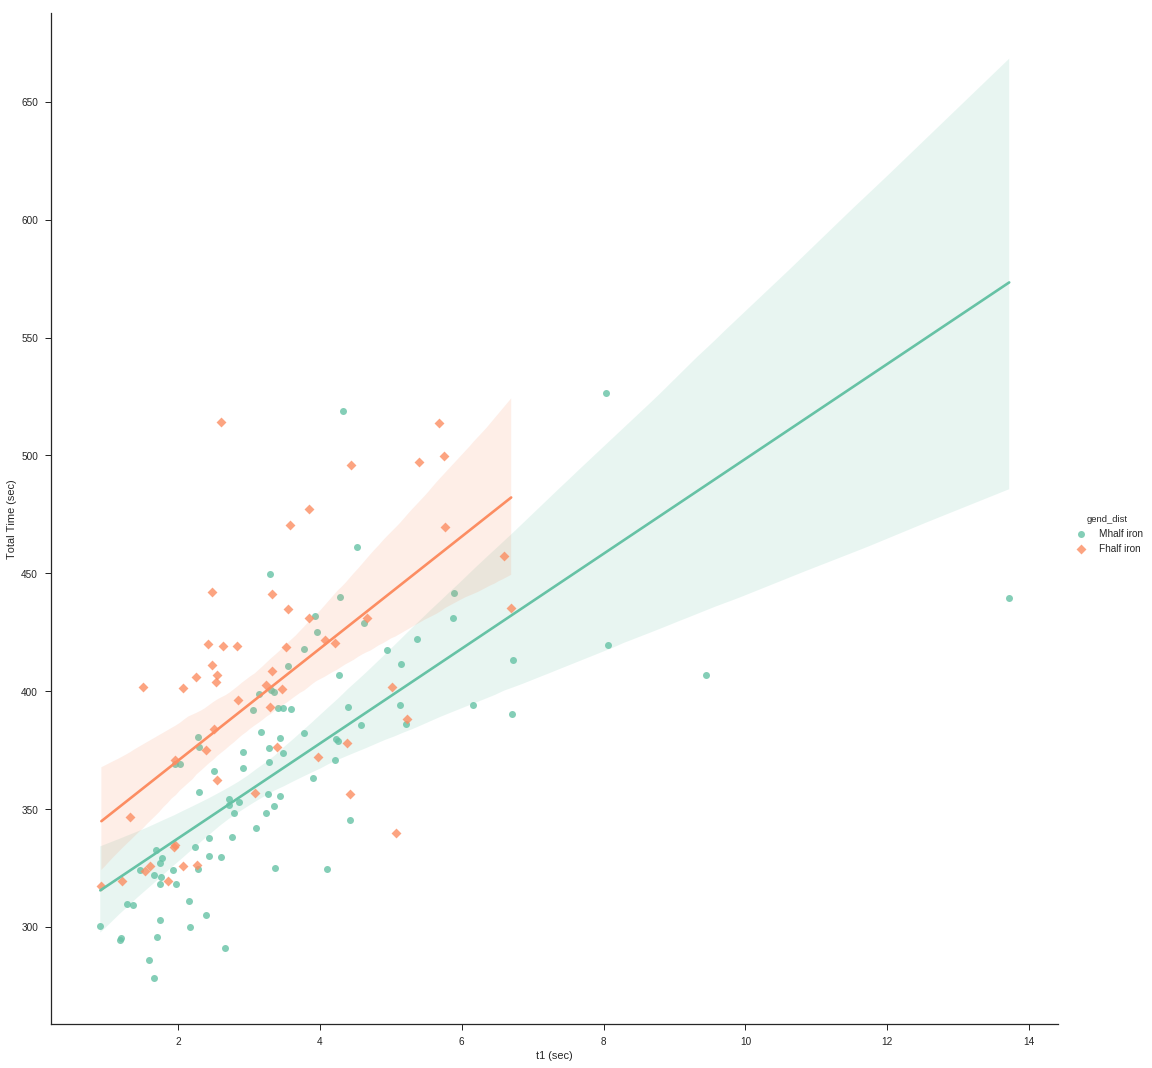

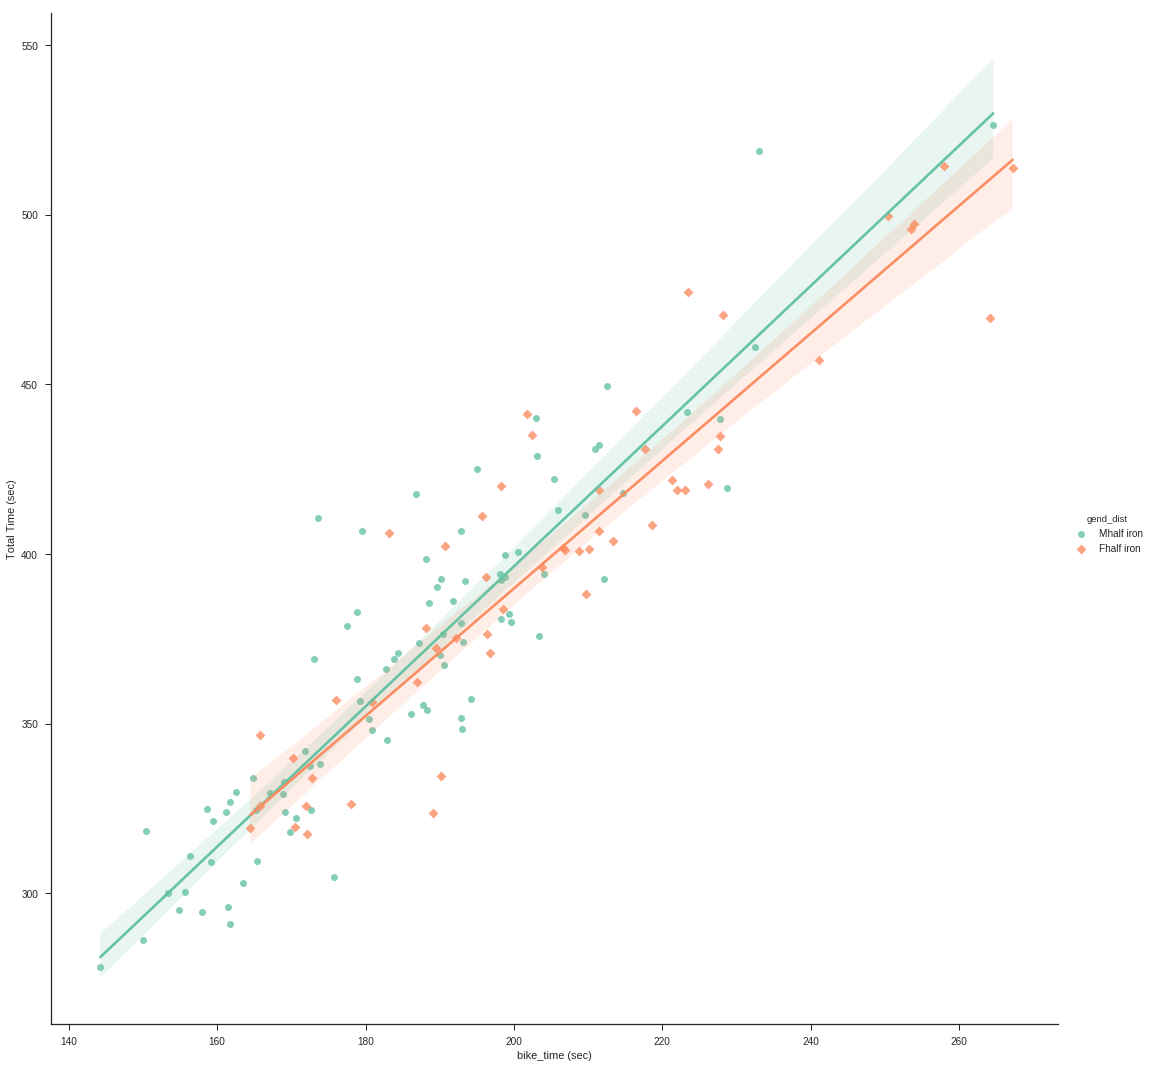

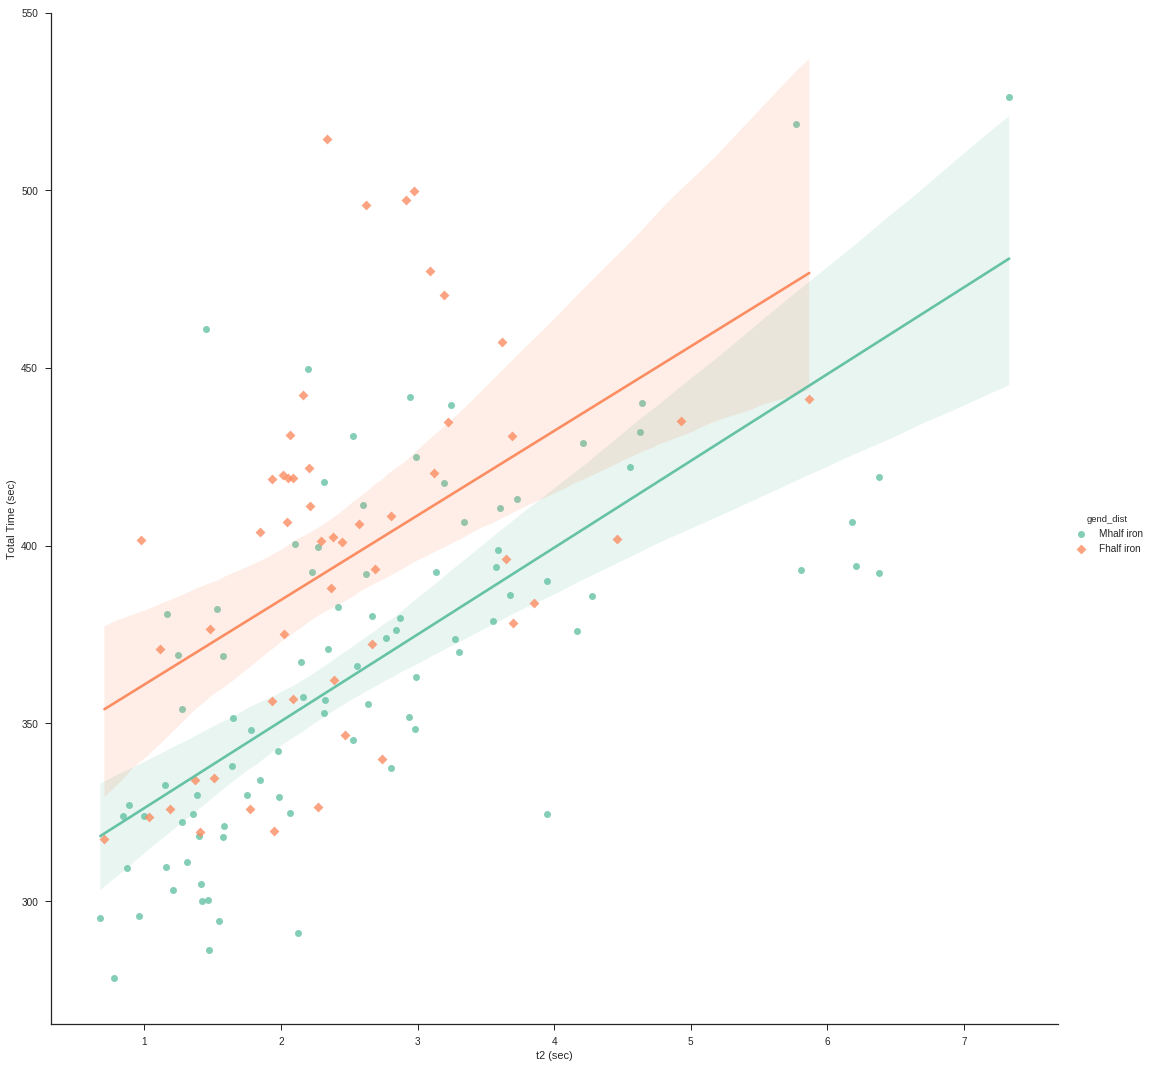

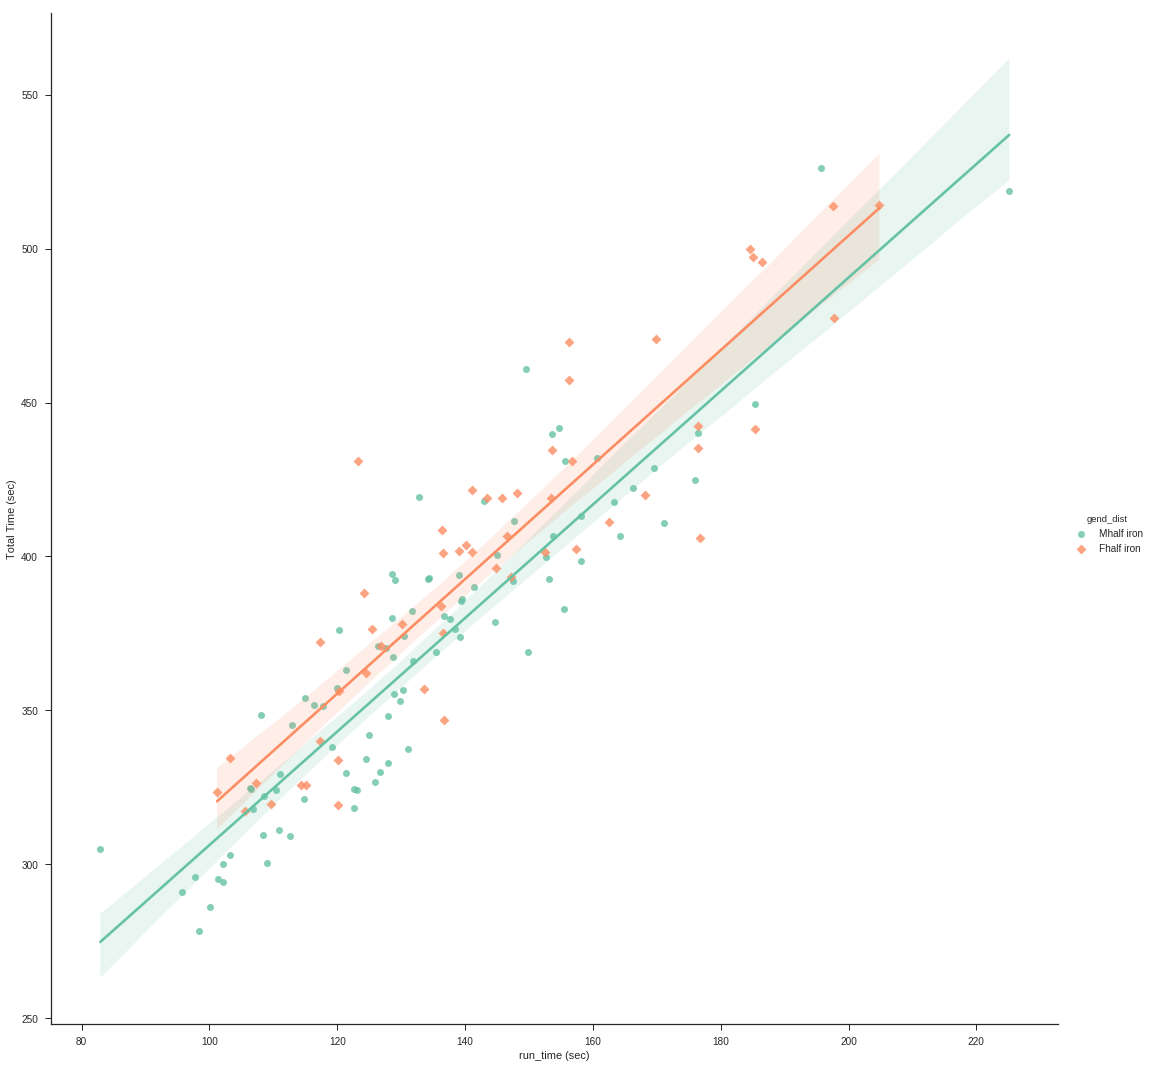

time: 2min 4s


In [12]:
def sns_scatter(df, col):
    g = sns.lmplot(x=col, y="total_time", hue="gend_dist",
                   truncate=True, size=15, data=df, markers=["o", "D"], palette="Set2", 
                  robust=True)
    g.set_axis_labels(col + " (sec)", "Total Time (sec)")

for dist in ['sprint', 'half iron']:
    for tc in ['swim_time', 't1', 'bike_time', 't2', 'run_time']:
        sns_scatter(df[df.dist == dist], tc)